### **Laboratorio 2**
### **Catedrático:** Ing. Pren Biba - Text Mining & Image Recognition
### **Marvin Fernando Carrillo Robles - 14003303**	 

# Problema 1

> Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

In [45]:
# Carga de Librerías
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [48]:
#Función 

def binarizar_imagen(imagen_path, umbral=128):
    imagen_original = Image.open(imagen_path)   
    
    # Conversión de imagen original a array
    img_array = np.array(imagen_original.convert("L"))

    # Binarización
    img_binarizada = (img_array > umbral) * 255   
    img_binarizada = img_binarizada.astype(np.uint8)   

    # Convertir el array de vuelta  
    imagen_binarizada = Image.fromarray(img_binarizada, 'L')
    
    return imagen_original, imagen_binarizada   

In [49]:
# Transformación de la Imagen

if __name__ == "__main__":
    
    imagen_path = "p1.jpg"  
    
    # Binarizar la imagen
    imagen_original, imagen_binarizada = binarizar_imagen(imagen_path, umbral=128)

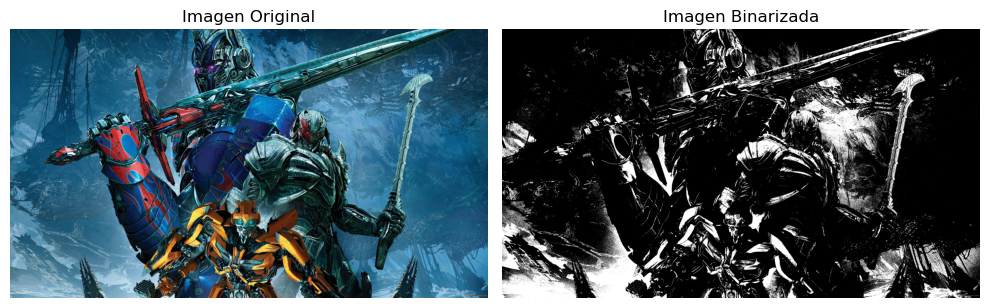

In [50]:
# Salida
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen_original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Binarizada')
plt.imshow(imagen_binarizada, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Problema 2

> Desarrolle una función que dada dos que usted desee del mismo tamaño (igual ancho y alto) y a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [51]:
# Carga de librerías
from PIL import Image
import numpy as np
from IPython.display import display

In [56]:
# Funciones

def binarizar_imagen(imagen, umbral=128):
    
    # Conversión de la imagen a un array 
    img_array = np.array(imagen)
    
    # Aplicar la binarización
    img_binarizada = (img_array > umbral) * 255   
    img_binarizada = img_binarizada.astype(np.uint8)   
    
    return img_binarizada

def operaciones_imagenes(imagen_path_a, imagen_path_b):
     
    imagen_a = Image.open(imagen_path_a)
    imagen_b = Image.open(imagen_path_b)
    
    # Binarizar  imágenes
    img_binarizada_a = binarizar_imagen(imagen_a.convert("L"))
    img_binarizada_b = binarizar_imagen(imagen_b.convert("L"))
    
    # Operaciones necesarias
    suma = np.clip(img_binarizada_a + img_binarizada_b, 0, 255).astype(np.uint8)
    resta = np.clip(img_binarizada_a - img_binarizada_b, 0, 255).astype(np.uint8)
    and_op = np.bitwise_and(img_binarizada_a, img_binarizada_b)
    or_op = np.bitwise_or(img_binarizada_a, img_binarizada_b)
    xor_op = np.bitwise_xor(img_binarizada_a, img_binarizada_b)

    # Conversión de resultados a imágenes
    imagen_suma = Image.fromarray(suma, 'L')
    imagen_resta = Image.fromarray(resta, 'L')
    imagen_and = Image.fromarray(and_op, 'L')
    imagen_or = Image.fromarray(or_op, 'L')
    imagen_xor = Image.fromarray(xor_op, 'L')

    # Retorno de imágenes resultantes
    return {
        'Original A': imagen_a,
        'Original B': imagen_b,
        'Suma': imagen_suma,
        'Resta': imagen_resta,
        'AND': imagen_and,
        'OR': imagen_or,
        'XOR': imagen_xor
    }


In [57]:
# Transformación

if __name__ == "__main__":
    imagen_path_a = "p2a.jpg"   # Cambia esta ruta a la ubicación de p2a.jpg
    imagen_path_b = "p2b.jpg"   # Cambia esta ruta a la ubicación de p2b.jpg
    
resultados = operaciones_imagenes(imagen_path_a, imagen_path_b)

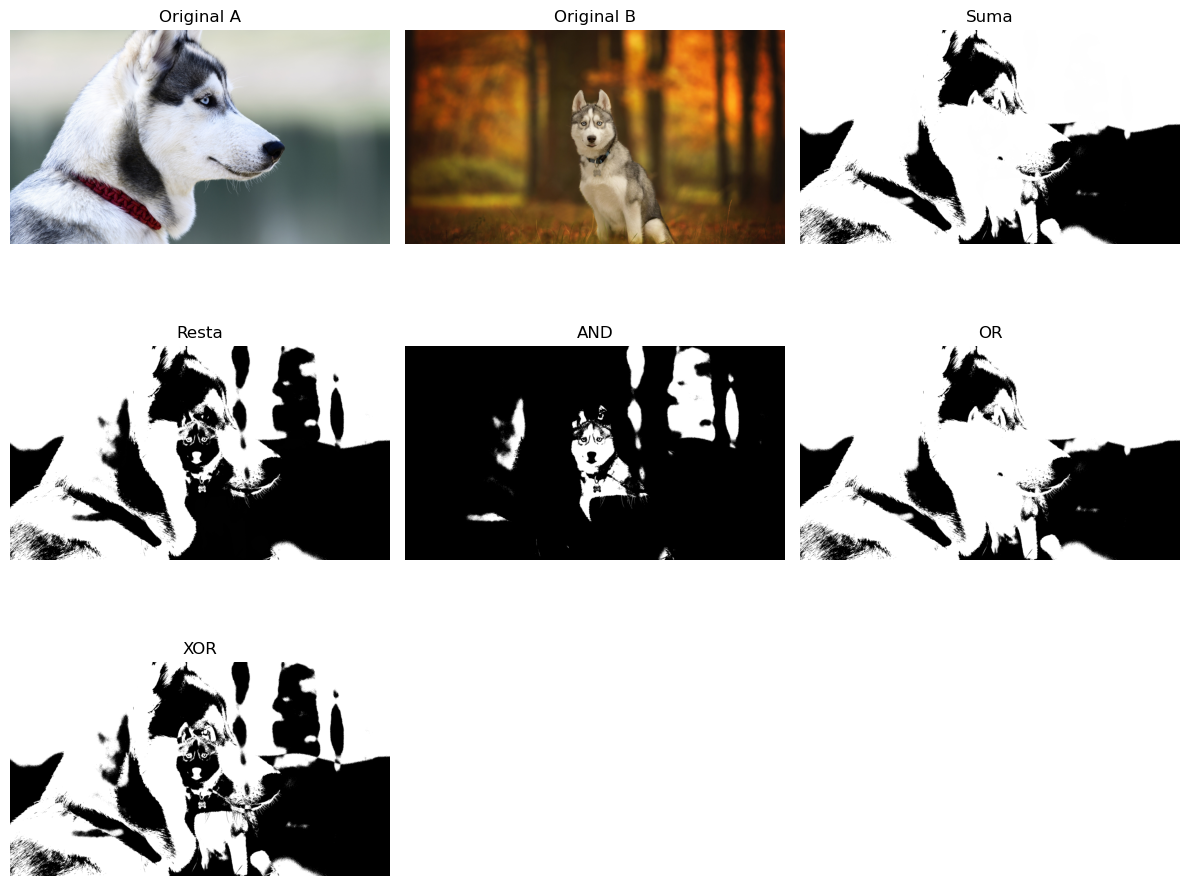

In [58]:
# Salida

plt.figure(figsize=(12, 10))

for i, (operacion, imagen) in enumerate(resultados.items()):
    plt.subplot(3, 3, i + 1)
    plt.title(operacion)
    plt.imshow(imagen if operacion.startswith('Original') else imagen, cmap='gray' if not operacion.startswith('Original') else None)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Problema 3

>Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [113]:
# Carga de librerías

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [117]:
# Funciones

def mostrar_imagen_3d(imagen_path):
     
    imagen = Image.open(imagen_path).convert("L")
    imagen = imagen.resize((800, 800))   
    img_array = np.array(imagen)
    
     
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(img_array, cmap='gray')
    ax1.set_title('Imagen en escala de grises')
    ax1.axis('off')
    
    
    # Graficar  superficie 3D
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    x = np.arange(img_array.shape[1])
    y = np.arange(img_array.shape[0])
    X, Y = np.meshgrid(x, y)
    
    
    ax2.plot_surface(X, Y, img_array, rstride=1, cstride=1, cmap='gray')
    
    # Configurar  ejes
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Intensidad de Gris')
    ax2.set_title('Imagen en 3D')
    
     
    plt.tight_layout()
   
    plt.show()


In [118]:
# Transformación de la imagen

if __name__ == "__main__":
   
    imagen_path = "p3.jpg" 

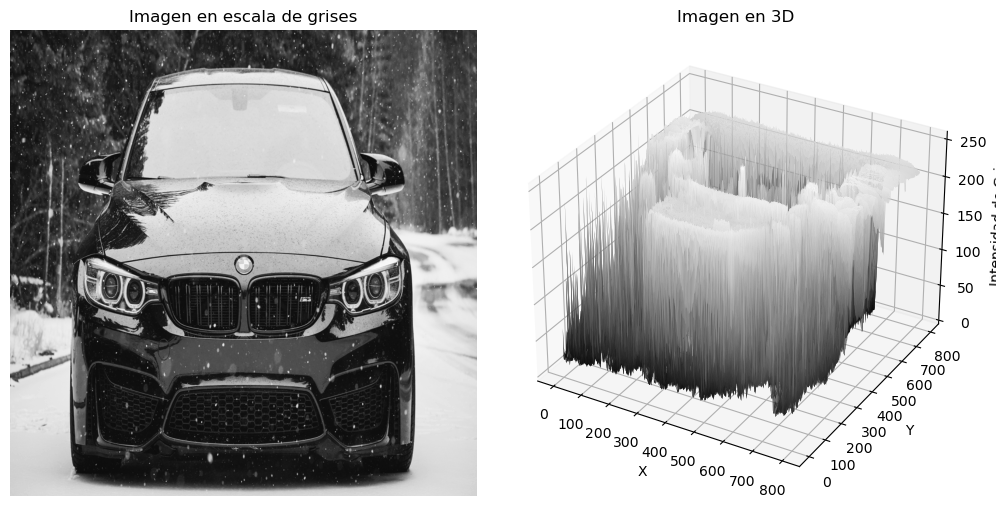

In [119]:
# Salida
 
mostrar_imagen_3d(imagen_path)

# Problema 4

> Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [7]:
# Carga de Librerías

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [18]:
# Funciones

def transformar_negativa(imagen):
     
    return 255 - imagen

# Transformación lineal 
def transformar_lineal(imagen, a=1.0, b=0):
    
    return np.clip(a * imagen + b, 0, 255).astype(np.uint8)

# Transformación logaritmica
def transformar_logaritmica(imagen):
 
    c = 255 / np.log(1 + np.max(imagen))  # Escala para que el valor máximo sea 255
    return np.clip(c * np.log(1 + imagen), 0, 255).astype(np.uint8)

# Transformación Exponencial
def transformar_exponencial(imagen, c=1):
  
    return np.clip(c * (np.exp(imagen / 255) - 1) * 255, 0, 255).astype(np.uint8)

# Transformaciones
def mostrar_transformaciones(imagen_path):
    
    imagen = Image.open(imagen_path).convert("L")
    img_array = np.array(imagen)

    # Transformaciones realizadas
    imagen_negativa = transformar_negativa(img_array)
    imagen_lineal = transformar_lineal(img_array)
    imagen_logaritmica = transformar_logaritmica(img_array)
    imagen_exponencial = transformar_exponencial(img_array)

    # Conversión de  resultados a imágenes
    imagen_negativa = Image.fromarray(imagen_negativa, 'L')
    imagen_lineal = Image.fromarray(imagen_lineal, 'L')
    imagen_logaritmica = Image.fromarray(imagen_logaritmica, 'L')
    imagen_exponencial = Image.fromarray(imagen_exponencial, 'L')

     
    plt.figure(figsize=(12, 10))

    plt.subplot(3, 2, 1)
    plt.title('Imagen Original')
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.title('Transformación Negativa')
    plt.imshow(imagen_negativa, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 2, 3)
    plt.title('Transformación Lineal')
    plt.imshow(imagen_lineal, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 2, 4)
    plt.title('Transformación Logarítmica')
    plt.imshow(imagen_logaritmica, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 2, 5)
    plt.title('Transformación Exponencial')
    plt.imshow(imagen_exponencial, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [19]:
# Transformación final

if __name__ == "__main__":
     
    imagen_path = "p4.jpg" 

C:\Users\Marvin\AppData\Local\Temp\ipykernel_3316\1767481515.py:16: RuntimeWarning: divide by zero encountered in log
  return np.clip(c * np.log(1 + imagen), 0, 255).astype(np.uint8)


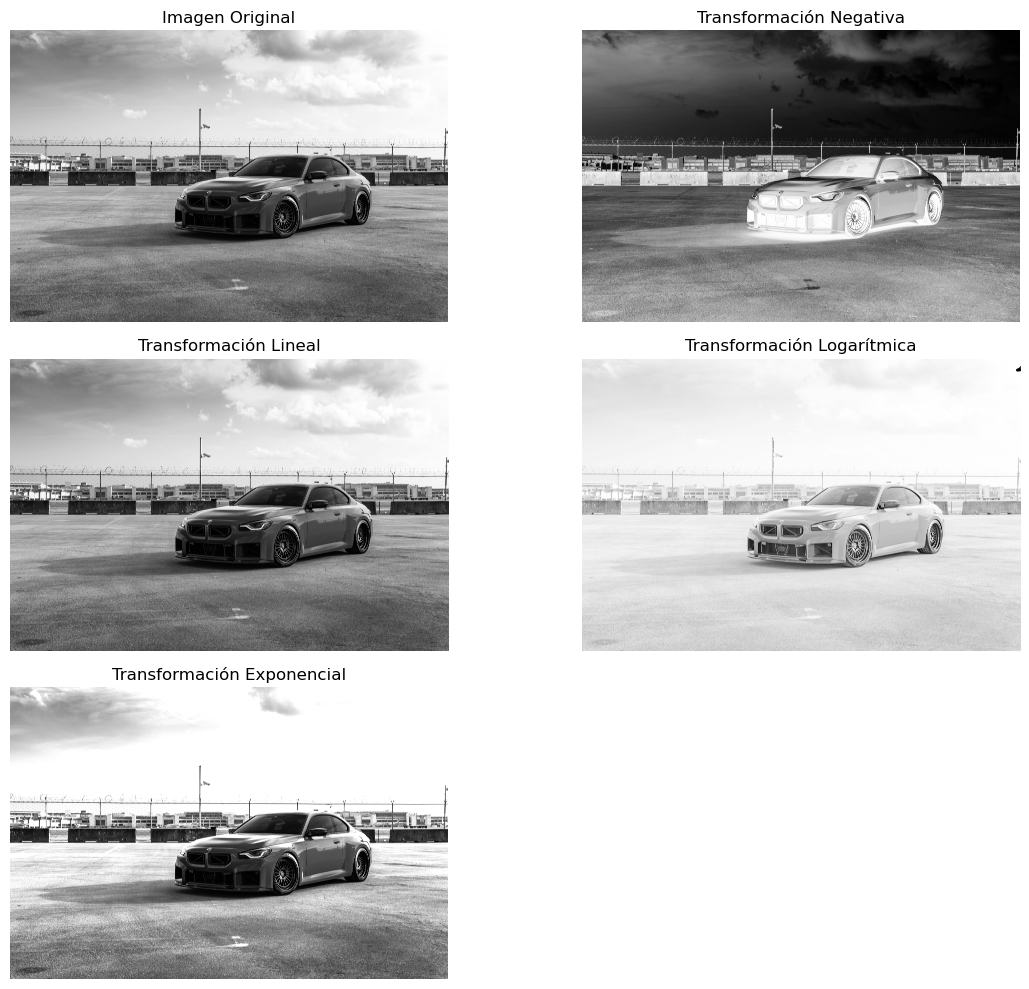

In [20]:
# Salida de resultados

mostrar_transformaciones(imagen_path)

# Problema 5

> Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

## Kernel Laplaciano

### Definición

Es un operador de derivada de segundo orden que se utiliza para detectar bordes en una imagen. A diferencia de los operadores de primer orden, como el **Sobel**, que calculan el gradiente de la imagen, el **Laplaciano** busca cambios abruptos en la intensidad de los píxeles. Esto se logra a través de la convolución de la imagen con un kernel específico.

<img src="ejemplo_laplaceano2.jpg" alt="drawing" width="600"/> 

#### _Características del Kernel Laplaciano_

* ***Sensibilidad al Ruido***: El Laplaciano es muy sensible al ruido, por lo que a menudo se aplica un filtro de suavizado (como un filtro gaussiano) antes de la detección de bordes.
* ***Detección de Bordes en Todas las Direcciones***: A diferencia de otros operadores que pueden estar orientados en una dirección específica, el Laplaciano detecta bordes en todas las direcciones.
* ***Máscara Común***: Una máscara típica del Laplaciano es:

<img src="ejemplo_laplaceano3.jpg" alt="drawing" width="500"/> 


## Algoritmo de Canny

### Definición

Es un enfoque más avanzado que utiliza múltiples etapas para detectar bordes. Este algoritmo incluye la aplicación de un filtro gaussiano para suavizar la imagen, la detección de bordes utilizando el gradiente, la supresión de no máximos y la histeresis para determinar los bordes finales.

<img src="ejemplo_canny.png" alt="drawing" width="500"/> 

##### _Características del Algoritmo de Canny_

* **Menos Sensible al Ruido**: Al aplicar un filtro gaussiano, Canny es menos susceptible al ruido en comparación con el Laplaciano.
* **Detección de Bordes Más Precisa**: Utiliza la magnitud y dirección del gradiente para determinar bordes, lo que resulta en una detección de bordes más precisa y continua.
* **Parámetros Ajustables**: El algoritmo requiere la configuración de parámetros como la desviación estándar del filtro gaussiano y los umbrales para la histeresis.

### Diferencias Clave

* **Método de Detección**: El Laplaciano utiliza derivadas de segundo orden y se basa en la convolución con un kernel, mientras que Canny utiliza un enfoque basado en gradientes y múltiples etapas.
* **Sensibilidad al Ruido**: El Laplaciano es más sensible al ruido, mientras que Canny incluye un paso de suavizado que lo hace menos susceptible.
* **Complejidad**: Canny es más complejo y requiere más cálculos, pero proporciona resultados más robustos.


<img src="ejemplo_canny_laplaciano.png" alt="drawing" width="600"/> 




### Ejemplo de Kernel Laplaciano vs Algoritmo de Canny

In [21]:
# carga de Librerías

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [30]:
# Función a utilizar

def detectar_bordes_laplaciano(imagen):
     
    imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Suavizado gaussiano
    imagen_suavizada = cv2.GaussianBlur(imagen_gray, (5, 5), 0)
    
    
    # Operador Laplaciano
    laplaciano = cv2.Laplacian(imagen_suavizada, cv2.CV_64F)
    return cv2.convertScaleAbs(laplaciano)

def detectar_bordes_canny(imagen):
     
    imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Algoritmo de Canny
    bordes = cv2.Canny(imagen_gray, 100, 200)
    return bordes



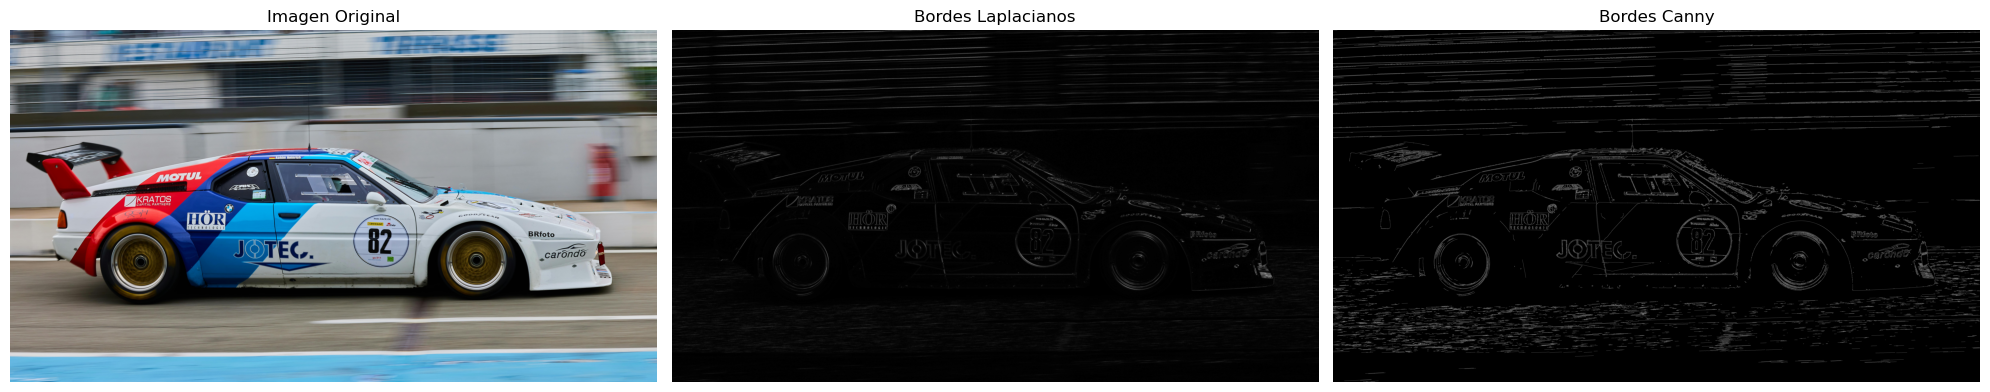

In [29]:
# Resultados 
imagen_path = "p5.jpg"  
imagen = cv2.imread(imagen_path)

# Detección de bordes
bordes_laplaciano = detectar_bordes_laplaciano(imagen)
bordes_canny = detectar_bordes_canny(imagen)

# Resultados
plt.figure(figsize=(20, 16))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Bordes Laplacianos')
plt.imshow(bordes_laplaciano, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Bordes Canny')
plt.imshow(bordes_canny, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()